##Ensemble Weather Forecasting


> ##### Adib Reza-24141197
> ##### Niaz Nafi Rahman-21301700
> ##### Zaid Rahman-24141195


## Table of Contents
* [Importing the required libraries](#2)
* [Data Analysis](#4)
    - [Feature Distribution](#41)
    - [EDA](#42)
  
         - [Average WindSpeed Analysis](#421)
         - [Average Humidity Analysis](#422)
         - [Average Pressure Analysis](#423)
         - [Average Temperature Analysis](#424)
    - [Correlation and Description of the data](#43)
* [Data Preprocessing](#5)
    - [Standardize the Variables](#51)
    - [Transforming Categorical Variables](#52)
* [Rainfall Occurrence Prediction](#6)
    - [Training Data and Test Data](#61)
    - [Model training and report](62)
* [Rainfall Amount Prediction](#7)
    - [Training Data and Test Data](#71)
    - [Model training and report](#72)
* [Average Temperature of a day Prediction](#8)
    - [Training Data and Test Data](#81)
    - [Model training and report](#84)


In [ ]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, VotingClassifier,VotingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
import seaborn as sns

<a id="3"></a>
# 3. Importing the Weather Dataset


In [ ]:
df = pd.read_csv("/content/Weather_Data.csv")
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


<a id="4"></a>
# 4. Data Analysis


## 4.1. Feature Distribution
<a id="41"></a>

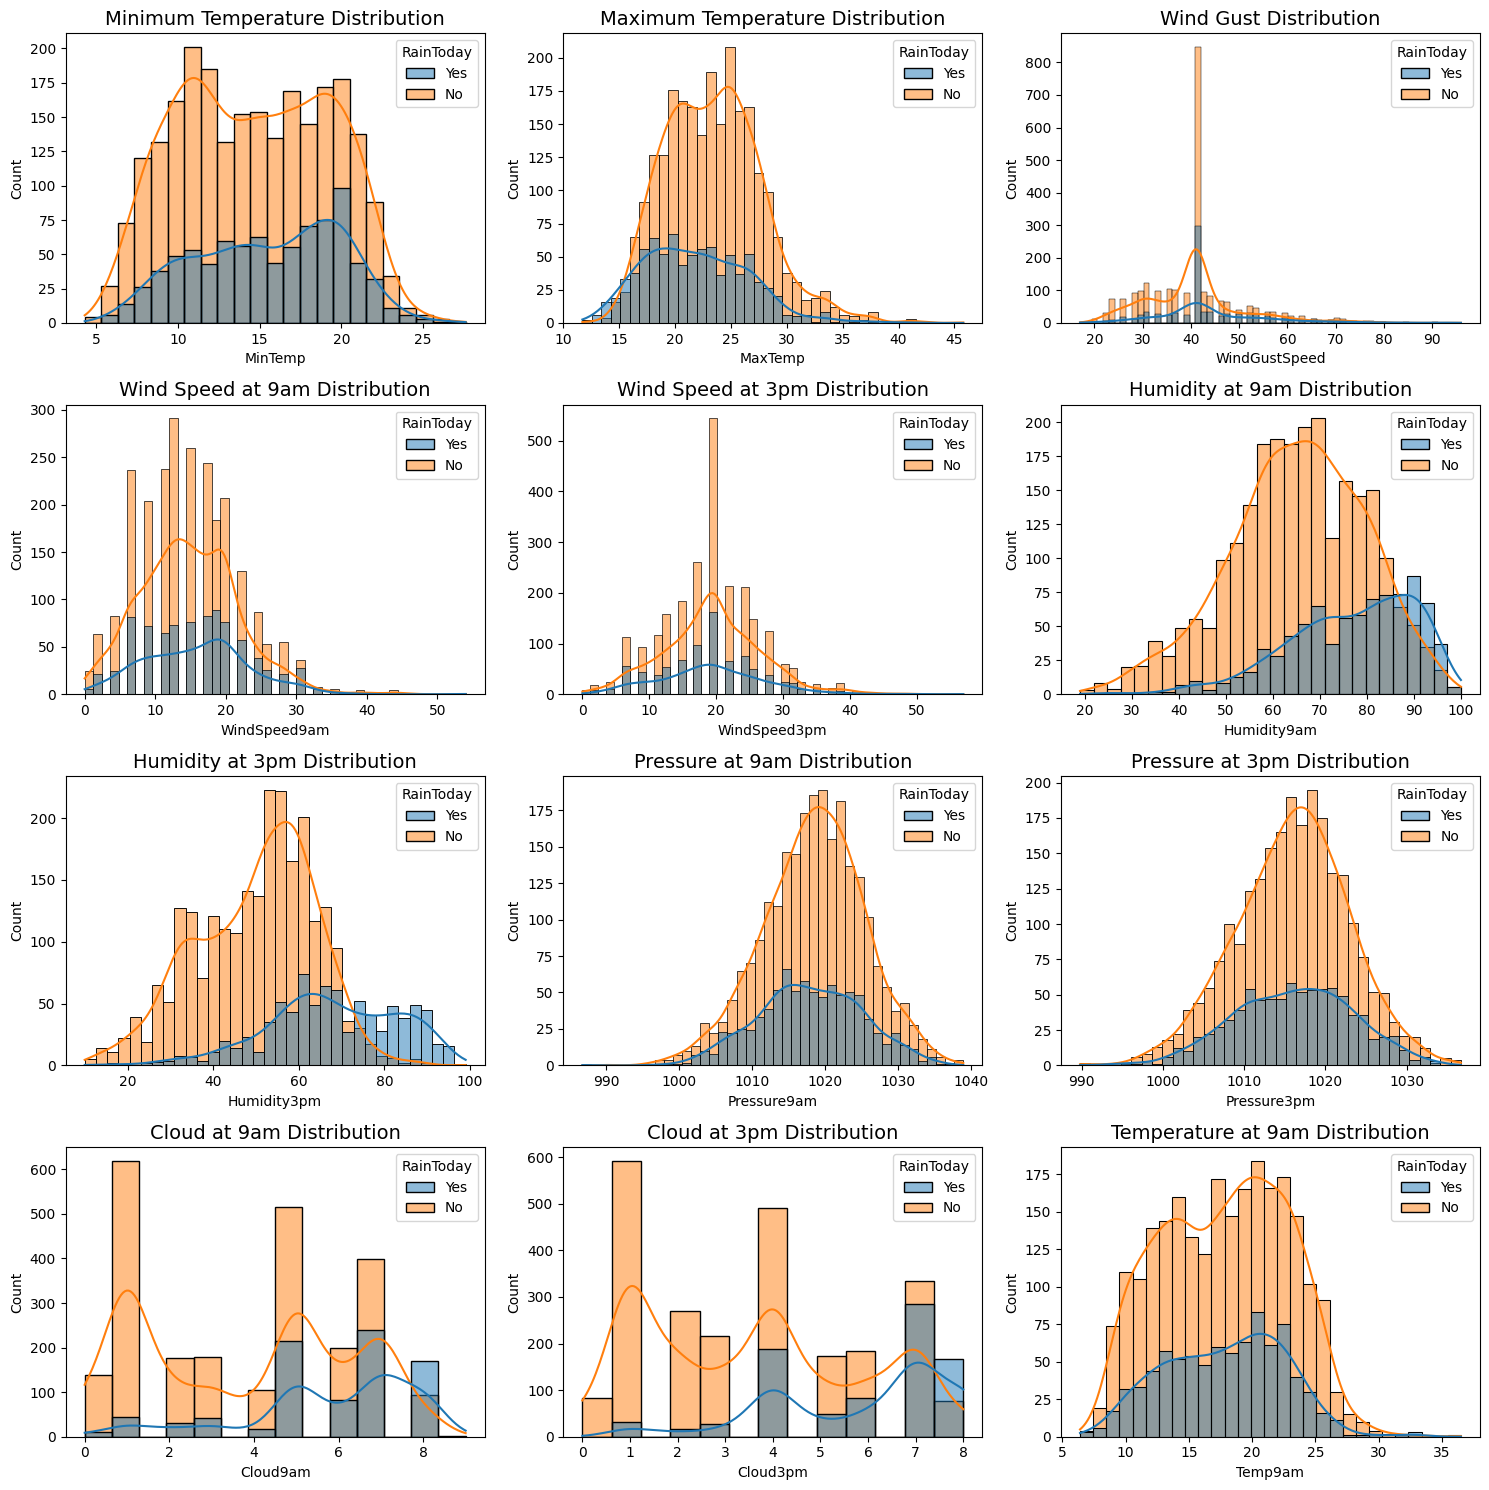

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Plot each distribution on its corresponding subplot
sns.histplot(df, x="MinTemp", hue='RainToday', kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Minimum Temperature Distribution", fontsize=14)

sns.histplot(df, x="MaxTemp", hue='RainToday', kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Maximum Temperature Distribution", fontsize=14)

sns.histplot(df, x="WindGustSpeed", hue='RainToday', kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Wind Gust Distribution", fontsize=14)

sns.histplot(df, x="WindSpeed9am", hue='RainToday', kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Wind Speed at 9am Distribution", fontsize=14)

sns.histplot(df, x="WindSpeed3pm", hue='RainToday', kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Wind Speed at 3pm Distribution", fontsize=14)

sns.histplot(df, x="Humidity9am", hue='RainToday', kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Humidity at 9am Distribution", fontsize=14)

sns.histplot(df, x="Humidity3pm", hue='RainToday', kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Humidity at 3pm Distribution", fontsize=14)

sns.histplot(df, x="Pressure9am", hue='RainToday', kde=True, ax=axes[2, 1])
axes[2, 1].set_title("Pressure at 9am Distribution", fontsize=14)

sns.histplot(df, x="Pressure3pm", hue='RainToday', kde=True, ax=axes[2, 2])
axes[2, 2].set_title("Pressure at 3pm Distribution", fontsize=14)

sns.histplot(df, x="Cloud9am", hue='RainToday', kde=True, ax=axes[3, 0])
axes[3, 0].set_title("Cloud at 9am Distribution", fontsize=14)

sns.histplot(df, x="Cloud3pm", hue='RainToday', kde=True, ax=axes[3, 1])
axes[3, 1].set_title("Cloud at 3pm Distribution", fontsize=14)

sns.histplot(df, x="Temp9am", hue='RainToday', kde=True, ax=axes[3, 2])
axes[3, 2].set_title("Temperature at 9am Distribution", fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Analysis Findings Summary


Higher wind speeds in the afternoon, particularly in August and September.
Higher humidity levels at 9 am compared to 3 pm, with peak morning humidity observed between January and February.
Consistently higher atmospheric pressure readings at 9 am compared to 3 pm, with peak pressure occurring in March and April.
Expected temperature fluctuations throughout the year.






## 4.2. EDA
<a id="42"></a>

### 4.2.1. Average WindSpeed Analysis
<a id="421"></a>

In [ ]:
windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df

,Date,WindSpeed9am,WindSpeed3pm
0,01,15.285171,17.403042
1,02,15.468504,18.228346
2,03,15.989247,18.053763
3,04,16.466667,19.396296
4,05,16.580645,18.419355
5,06,15.077778,18.807407
6,07,14.612903,20.229391
7,08,13.645161,20.114695
8,09,13.818519,21.203704
9,10,13.896057,21.007168


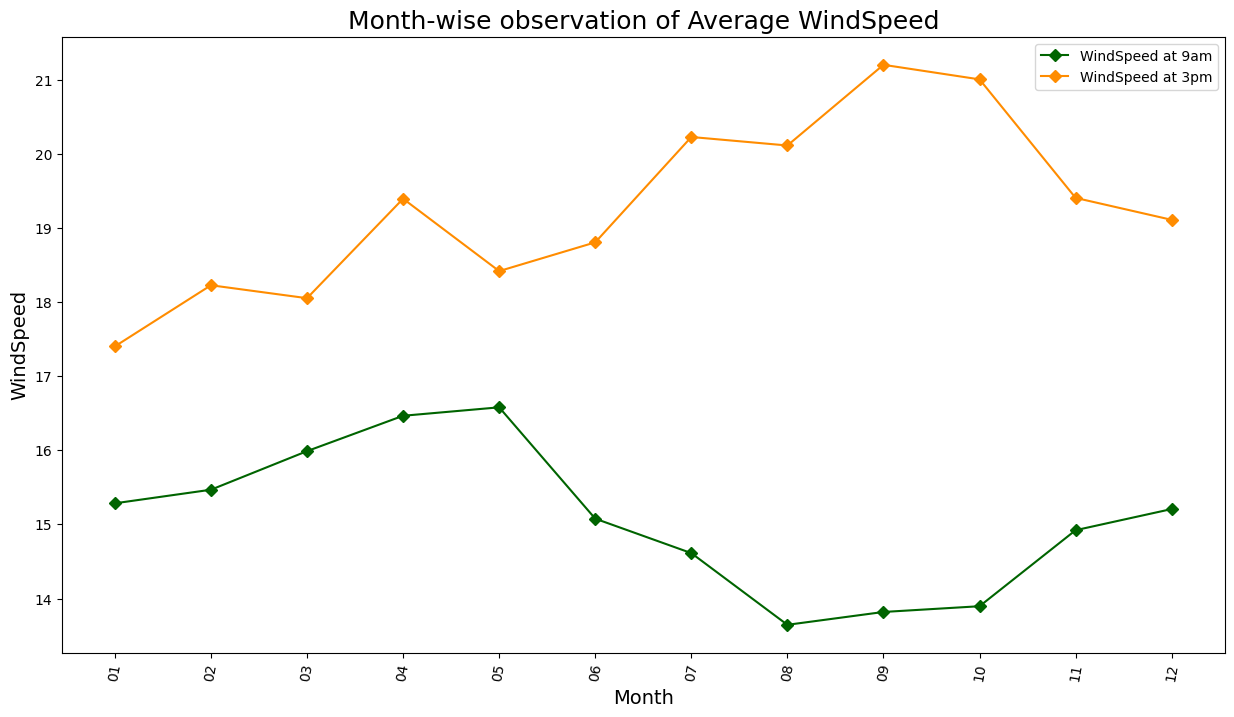

In [ ]:
x = windspeed_weather_df.loc[:, 'Date']
y1 = windspeed_weather_df['WindSpeed9am']
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am')
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Month-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the wind speed between the month of May and June at 9 am has the highest wind speed at 16.5 kmph. On the other hand, at 3 pm between month August and September has the highest wind speed at 21.77 kmph. Finally, it can be concluded that the wind speed at 3 pm is much higher than the wind speed at 9 am.

### 4.2.2. Average Humidity Analysis
<a id="422"></a>

In [ ]:
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df

,Date,Humidity9am,Humidity3pm
0,01,73.574144,57.136882
1,02,72.830709,56.468504
2,03,68.519713,52.698925
3,04,67.285185,52.374074
4,05,64.014337,49.906810
5,06,66.433333,54.000000
6,07,65.179211,52.333333
7,08,64.164875,52.867384
8,09,65.844444,56.100000
9,10,71.197133,59.139785


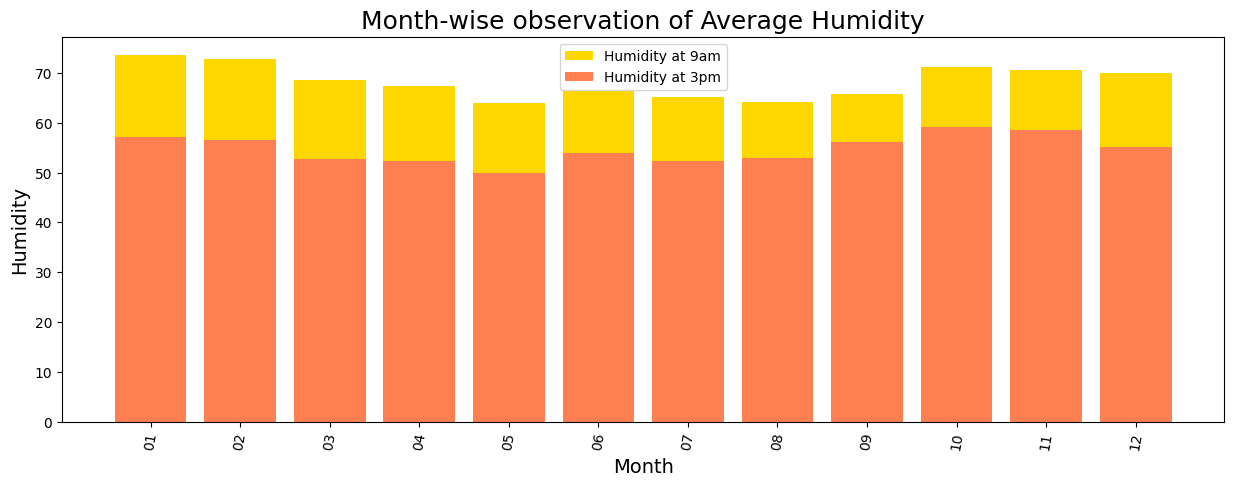

In [ ]:
x = humidity_weather_df.loc[:, 'Date']
y1 = humidity_weather_df['Humidity9am']
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 5))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am')
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Month-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the humidity between the month January and February at 9 am has the highest humidity as 74.38%. On the other hand, at 3 pm , between the month September and Octorber has the highest humidity as 58.24%. Finally, it can be concluded that humadity at 9 am is much higher than the humadity at 3 pm.

### 4.2.3. Average Pressure Analysis
<a id="423"></a>

In [ ]:
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df

,Date,Pressure9am,Pressure3pm
0,01,1019.358175,1017.123574
1,02,1018.531496,1016.374803
2,03,1020.687097,1018.254122
3,04,1020.229630,1017.622222
4,05,1019.886738,1017.269391
5,06,1018.396667,1015.952593
6,07,1017.147670,1014.789964
7,08,1015.941577,1013.565789
8,09,1016.675556,1014.475100
9,10,1018.082079,1016.032258


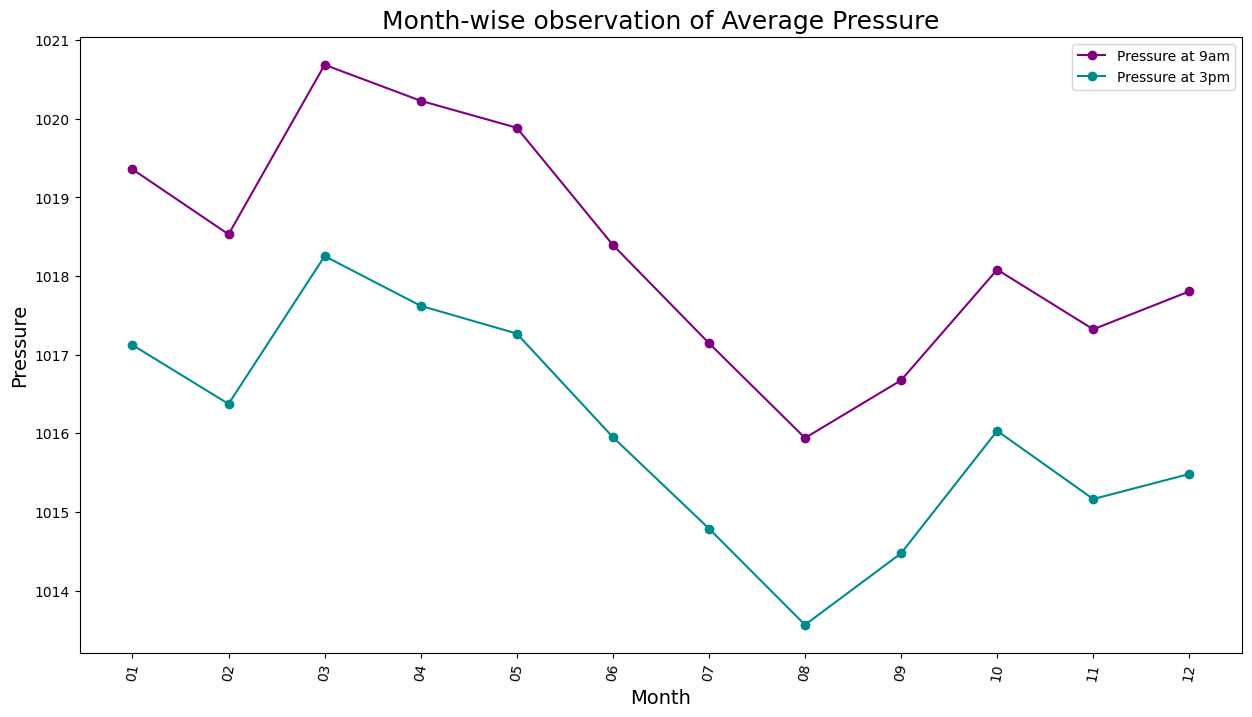

In [ ]:
x = pressure_weather_df.loc[:, 'Date']
y1 = pressure_weather_df['Pressure9am']
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am')
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the pressure  between the month of March and April at 9 am has the highest pressure as 1022.93 hPa. On the other hand, at 3 pm, between the month March and April has the highest pressure as 1018.79 hPa. Finally, it can be concluded that pressure at 9 am is much higher than the pressure at 3 pm.

### 4.2.4. Average Temperature Analysis
<a id="424"></a>

In [ ]:
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df

,Date,MinTemp,MaxTemp,Temp9am,Temp3pm
0,01,14.851331,22.621673,17.158555,21.422814
1,02,14.154331,21.984252,16.439764,20.783858
2,03,12.713620,21.339068,15.451971,20.127599
3,04,12.600000,21.145926,15.721111,19.736667
4,05,12.651971,21.878495,15.939785,20.335125
5,06,13.621852,22.000741,16.786296,20.429259
6,07,14.223297,22.521505,17.465591,20.882437
7,08,15.870251,24.025090,19.237276,22.390323
8,09,17.608148,25.315926,21.029630,23.648889
9,10,17.709319,24.853047,20.483154,23.400000


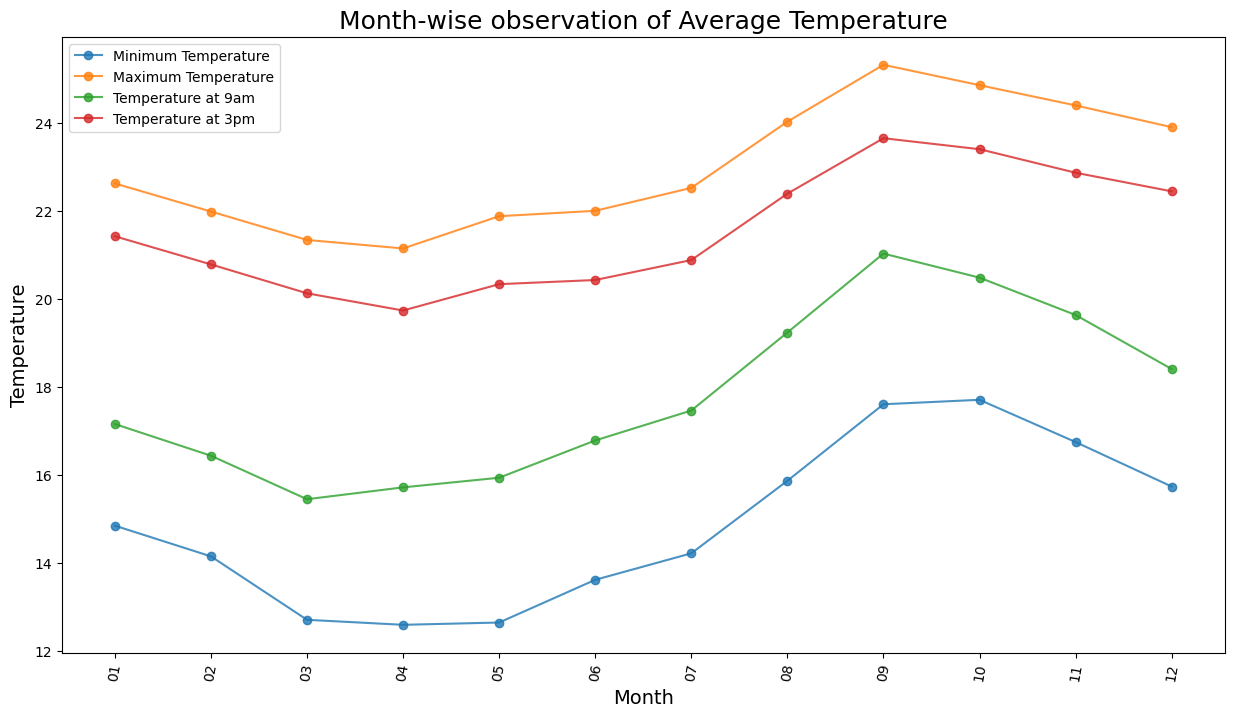

In [ ]:
x = location_weather_df.loc[:, 'Date']
y1 = location_weather_df['MinTemp']
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am']
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8)
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8)
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8)
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Month-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

## 4.3. Correlation and Description of the data
<a id="43"></a>

In [ ]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


Finding the correlation values

In [ ]:
bf=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [ ]:
bf.corr()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


<Axes: >

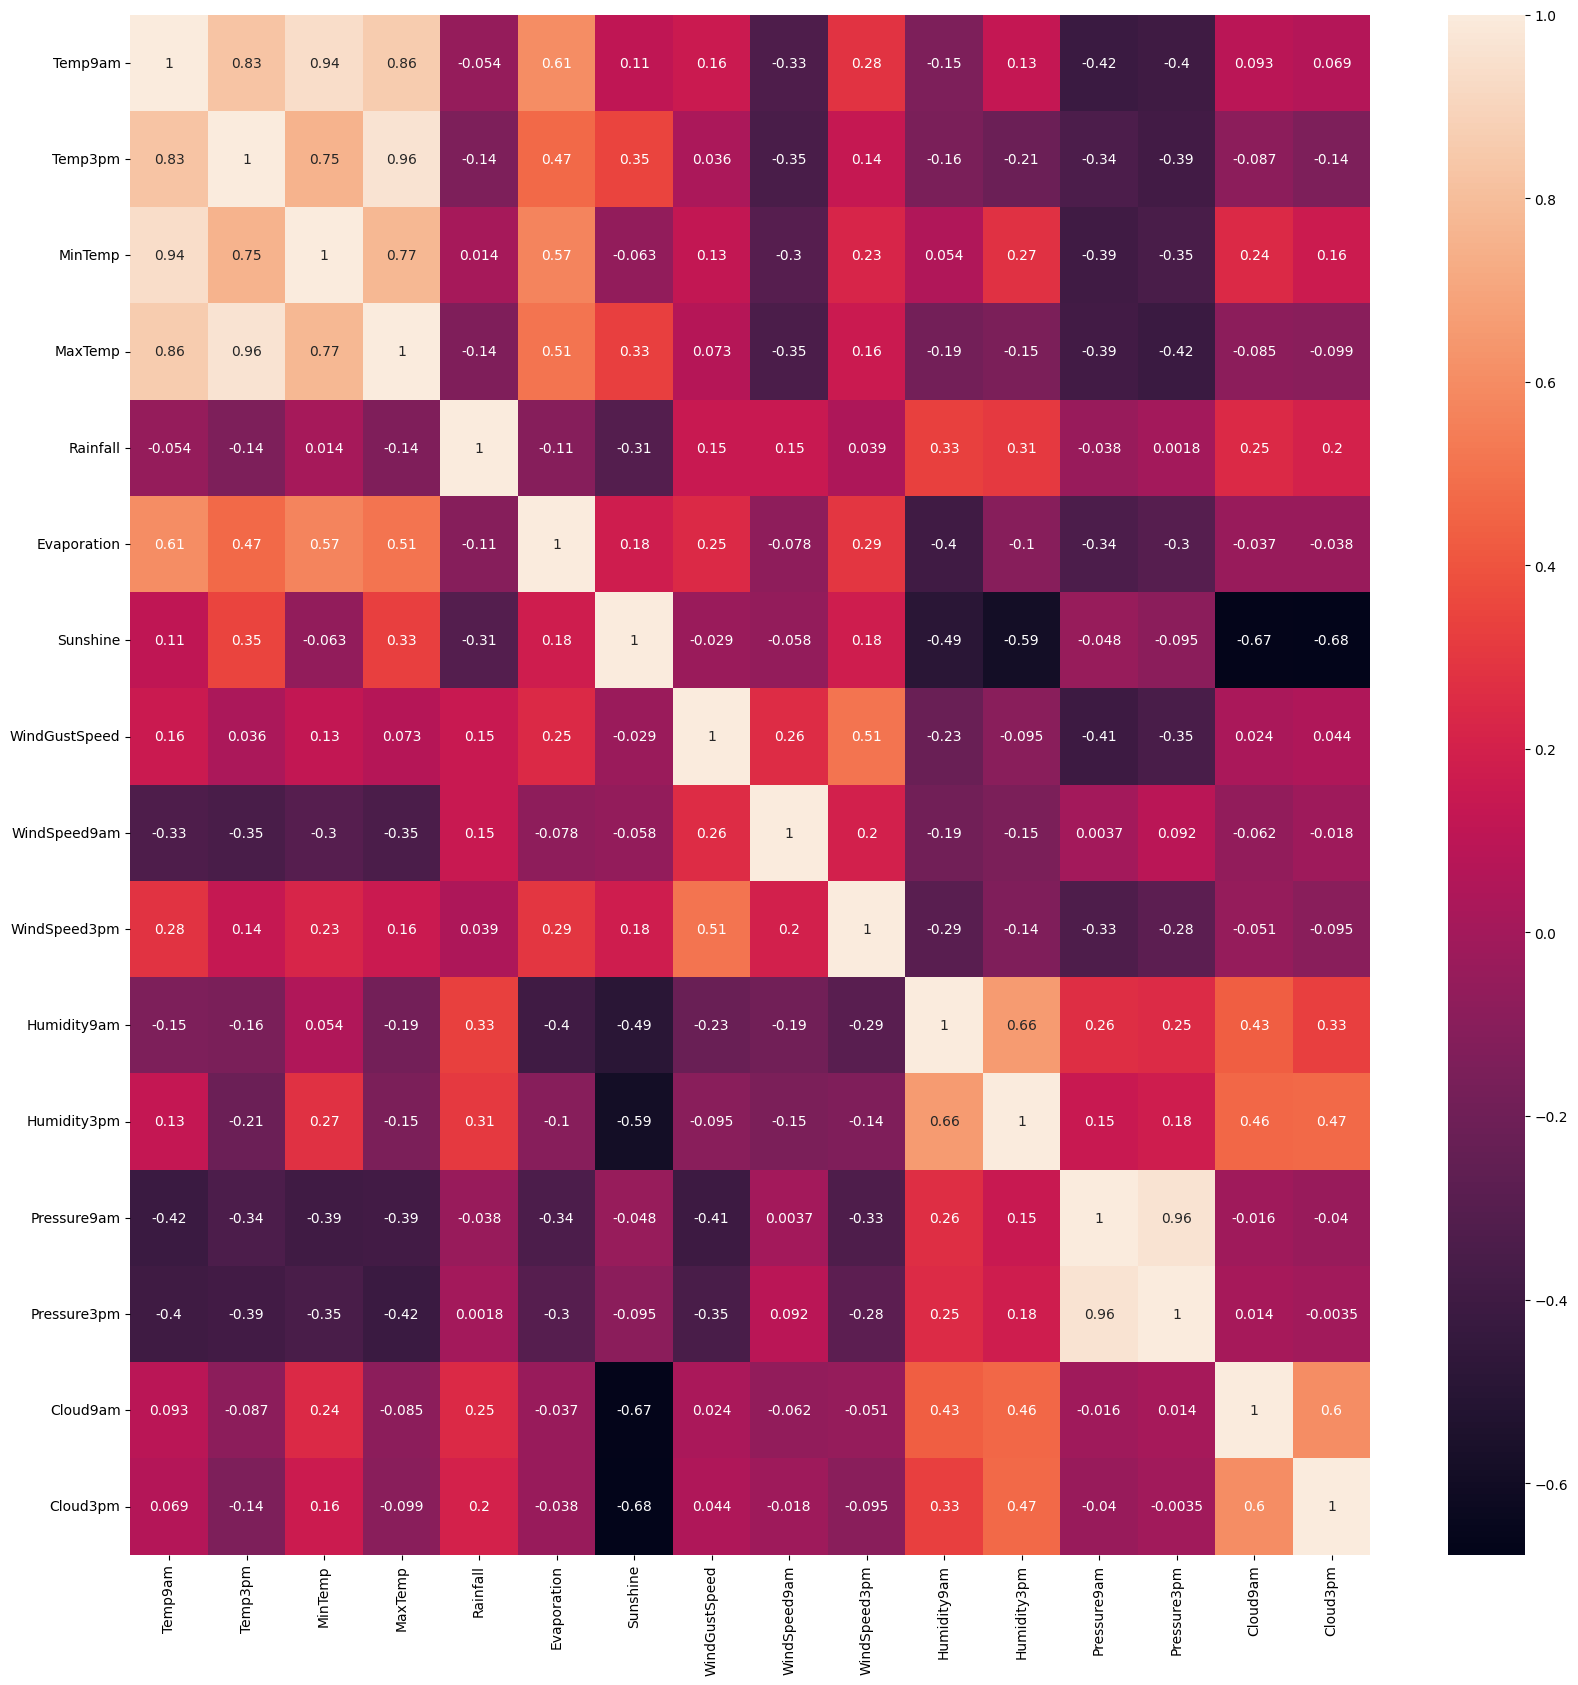

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)

# 5. Data Preprocessing
<a id="5"></a>


In [ ]:
df.isnull().sum()

Date             0
Temp9am          0
Temp3pm          0
MinTemp          0
MaxTemp          0
Rainfall         0
RainToday        0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
dtype: int64

## 5.1. Standardize the Variables
<a id="51"></a>

Because the classifier and regressor predicts the class/values of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observation.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(bf)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(bf)

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=bf.columns[:16])
selected_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]
df_feat[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']] = selected_columns.copy()
df_feat.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Date,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,1.800202,-0.104633,0.199024,1.457110,1.586088,01-02-13,Yes,W,S,SSW
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,1.124391,-0.061892,0.056550,1.061312,1.171306,02-02-13,Yes,W,W,E
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,1.923076,-0.232857,-0.057429,1.061312,1.586088,03-02-13,Yes,W,ESE,ESE
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,2.168826,-0.589032,-0.598829,1.457110,1.586088,04-02-13,Yes,W,NNE,E
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,1.185828,-1.429605,-1.596144,1.457110,1.586088,05-02-13,Yes,W,NNE,W


## 5.2. Transforming Categorical Variables
<a id="52"></a>


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [ ]:
df_proc = pd.get_dummies(data=df_feat, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,False,False,False,False,False,True,False,False,False,False
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,False,False,False,False,False,False,False,False,False,False
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,False,False,False,False,False,False,False,False,False,False
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,False,False,False,False,False,False,False,False,False,False
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,False,False,False,False,False,False,False,True,False,False


Next, we replace the values of the 'RainToday' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainToday' and we do not want, since 'RainToday' is our target.


In [ ]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainToday']]

,Date,RainToday
0,01-02-13,1
1,02-02-13,1
2,03-02-13,1
3,04-02-13,1
4,05-02-13,1
...,...,...
3266,11-01-22,0
3267,12-01-22,0
3268,13-01-22,0
3269,14-01-22,0


In [ ]:
df_proc.drop('Date',axis=1,inplace=True)

In [ ]:
df_proc['RainToday'].value_counts()

RainToday
0    2422
1     849
Name: count, dtype: int64

# 6. Rainfall Occurance Prediction
<a id="6"></a>


 For this we will split our dataset

## 6.1. Training Data and Test Data
<a id="61"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_proc = df_proc.astype(float)

We need to predict if the rain will fall or not. So we choose the RainToday column as the target.

In [ ]:
features = df_proc.drop(columns='RainToday', axis=1)
Y = df_proc['RainToday']

In [ ]:
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(features, Y,  test_size=0.35, random_state=101)

## Resampling to balance the dataset(UnderSample)

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# X = df.drop(columns=['RainToday'])
# y = df['RainToday']

# undersampler = RandomUnderSampler(random_state=42)

# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# df_resampled['RainToday'] = y_resampled

# print(df_resampled['RainToday'].value_counts())


## Resampling to balance the dataset(Oversample)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df_proc.drop(columns=['RainToday'])
y = df_proc['RainToday']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['RainToday'] = y_resampled

print(df_resampled['RainToday'].value_counts())


RainToday
1.0    2422
0.0    2422
Name: count, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y,  test_size=0.35,stratify = Y, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


In [ ]:
# x_train['RainToday'].value_counts()

## 6.5. SVM Classification Model
<a id="65"></a>


In [ ]:
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import pandas as pd

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=4),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# original data
for name, classifier in classifiers.items():
    classifier.fit(x_train_og, y_train_og)

# oversampled data
for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)

accuracy_scores_orig = {}
f1_scores_orig = {}
for name, classifier in classifiers.items():
    accuracy_scores_orig[name] = accuracy_score(classifier.predict(x_test_og), y_test_og)
    f1_scores_orig[name] = f1_score(classifier.predict(x_test_og), y_test_og)

accuracy_scores_resampled = {}
f1_scores_resampled = {}
for name, classifier in classifiers.items():
    accuracy_scores_resampled[name] = accuracy_score(classifier.predict(x_test), y_test)
    f1_scores_resampled[name] = f1_score(classifier.predict(x_test), y_test)

report_orig = pd.DataFrame({
    'Classification Algorithm': list(classifiers.keys()),
    'Accuracy Score (Original)': list(accuracy_scores_orig.values()),
    'F1-score (Original)': list(f1_scores_orig.values())})

report_resampled = pd.DataFrame({
    'Classification Algo': list(classifiers.keys()),
    'Accuracy Score(Oversampled)': list(accuracy_scores_resampled.values()),
    'F1-score (Oversampled)': list(f1_scores_resampled.values())})

print(report_orig)
print(report_resampled)

  Classification Algorithm  Accuracy Score (Original)  F1-score (Original)
0      Logistic Regression                   0.833188             0.631985
1                      KNN                   0.836681             0.585366
2            Decision Tree                   0.926638             0.861842
3                      SVM                   0.837555             0.635294
4            Random Forest                   0.944105             0.886525
   Classification Algo  Accuracy Score(Oversampled)  F1-score (Oversampled)
0  Logistic Regression                     0.835808                0.643939
1                  KNN                     0.806114                0.504464
2        Decision Tree                     0.765939                0.579937
3                  SVM                     0.837555                0.628000
4        Random Forest                     0.843668                0.638384


In [ ]:
import plotly.express as px

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy Scores Comparison", "F1-scores Comparison"))

# accuracy scores
fig.add_trace(
    go.Bar(x=report_orig['Classification Algorithm'], y=report_orig['Accuracy Score (Original)'], name='Original'),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=report_resampled['Classification Algo'], y=report_resampled['Accuracy Score(Oversampled)'], name='Oversampled'),
    row=1, col=1)

#F1 score
fig.add_trace(
    go.Bar(x=report_orig['Classification Algorithm'], y=report_orig['F1-score (Original)'], name='Original'),
    row=1, col=2)

fig.add_trace(
    go.Bar(x=report_resampled['Classification Algo'], y=report_resampled['F1-score (Oversampled)'], name='Oversampled'),
    row=1, col=2)


fig.update_layout(title_text="Comparison of Performance Metrics (Original vs Oversampled)",
                  xaxis_title="Classification Algorithm",
                  yaxis_title="Score",
                  barmode='group')


fig.show()

In [ ]:
# # Plot the comparison using a bar chart
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy Scores Comparison", "F1-scores Comparison"))

# fig.add_trace(
#     go.Bar(x=report_orig.index, y=report_orig['Accuracy Score (Original)'], name='Original'),
#     row=1, col=1)

# fig.add_trace(
#     go.Bar(x=report_resampled.index, y=report_resampled['Accuracy Score(Oversampled)'], name='Oversampled'),
#     row=1, col=1)

# fig.add_trace(
#     go.Bar(x=report_orig.index, y=report_orig['F1-score (Original)'], name='Original'),
#     row=1, col=2)

# fig.add_trace(
#     go.Bar(x=report_resampled.index, y=report_resampled['F1-score (Oversampled)'], name='Oversampled'),
#     row=1, col=2)

# fig.update_layout(title_text="Comparison of Performance Metrics (Original vs Oversampled)",
#                   xaxis_title="Classifier",
#                   yaxis_title="Score",
#                   barmode='group')

# fig.show()


##### Here is the visualisation of the classfication algorithm performance with the ensembled classifiers

# 7. Rainfall Amount Prediction
<a id="7"></a>


For this we will split our dataset

## 7.1. Training Data and Test Data
<a id="71"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_proc = df_proc.astype(float)

We need to predict the rainfall of a particular day in mm unit. So we choose the Rainfall column as the target.

In [ ]:
features = df_proc.drop(columns='Rainfall', axis=1)
Y = df_proc['Rainfall']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


In [ ]:
from sklearn import metrics
from sklearn.ensemble import VotingRegressor


# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "SVM Regression": SVR()
}

# Train regressors
for name, regressor in regressors.items():
    print(f"Training {name} model...")
    regressor.fit(x_train, y_train)
    print(f"{name} model trained successfully.\n")



# Ensemble of the above regression models
ereg = VotingRegressor(estimators=[('LinearReg', regressors["Linear Regression"]),
                                   ('RandomForest', regressors["Random Forest Regression"]),
                                   ('SVR', regressors["SVM Regression"])],
                       weights=[1, 2, 3])
ereg.fit(x_train, y_train)



# Calculate MAE and RMSE for each regressor and the ensemble
mae_scores = {}
rmse_scores = {}
for name, regressor in regressors.items():
    mae_scores[name] = metrics.mean_absolute_error(regressor.predict(x_test), y_test)
    rmse_scores[name] = metrics.mean_squared_error(regressor.predict(x_test), y_test, squared=False)

mae_scores['Ensemble Regression'] = metrics.mean_absolute_error(ereg.predict(x_test), y_test)
rmse_scores['Ensemble Regression'] = metrics.mean_squared_error(ereg.predict(x_test), y_test, squared=False)




# Create a DataFrame for the report
Report = pd.DataFrame({
    'Regression Algorithm': list(regressors.keys()) + ['Ensemble Regression'],
    'MAE': list(mae_scores.values()),
    'RMSE': list(rmse_scores.values())
})

Report


Training Linear Regression model...
Linear Regression model trained successfully.

Training Random Forest Regression model...
Random Forest Regression model trained successfully.

Training SVM Regression model...
SVM Regression model trained successfully.



,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.498759,0.948284
1,Random Forest Regression,0.380702,0.886590
2,SVM Regression,0.365070,0.971967
3,Ensemble Regression,0.365533,0.904451


In [ ]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()




# 8. Average Temperature  of a day Prediction
<a id="8"></a>


For this we will split our dataset

## 8.1. Training Data and Test Data
<a id="81"></a>


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_proc = df_proc.astype(float)

We need to predict the average temperature of a particular day in celcius unit. So we choose the a new column called AvgTemp as the target.

In [ ]:
df_proc['AvgTemp']=df_proc[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
features = df_proc.drop(columns=['Temp9am', 'Temp3pm','MinTemp','MaxTemp','AvgTemp'], axis=1)
Y = df_proc['AvgTemp']

For this, we have used for columns e.g Temp9am, Temp3pm, MinTemp and MaxTemp to create the new column AvgTemp and which is our target variable.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

##### Here we have used `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.35` and the `random_state` set to `101`.


In [ ]:
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
import pandas as pd

# Define regressors
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "SVM Regression": SVR()
}

# Train regressors
for name, regressor in regressors.items():
    print(f"Training {name} model...")
    regressor.fit(x_train, y_train)
    print(f"{name} model trained successfully.\n")

# Ensemble of the above regression models
ereg = VotingRegressor(estimators=[('LinearReg', regressors["Linear Regression"]),
                                   ('RandomForest', regressors["Random Forest Regression"]),
                                   ('SVR', regressors["SVM Regression"])],
                       weights=[1, 2, 3])
ereg.fit(x_train, y_train)

# Calculate MAE and RMSE for each regressor and the ensemble
mae_scores = {}
rmse_scores = {}
for name, regressor in regressors.items():
    mae_scores[name] = metrics.mean_absolute_error(regressor.predict(x_test), y_test)
    rmse_scores[name] = metrics.mean_squared_error(regressor.predict(x_test), y_test, squared=False)

mae_scores['Ensemble Regression'] = metrics.mean_absolute_error(ereg.predict(x_test), y_test)
rmse_scores['Ensemble Regression'] = metrics.mean_squared_error(ereg.predict(x_test), y_test, squared=False)

# Create a DataFrame for the report
Report = pd.DataFrame({
    'Regression Algorithm': list(regressors.keys()) + ['Ensemble Regression'],
    'MAE': list(mae_scores.values()),
    'RMSE': list(rmse_scores.values())
})

Report


Training Linear Regression model...
Linear Regression model trained successfully.

Training Random Forest Regression model...
Random Forest Regression model trained successfully.

Training SVM Regression model...
SVM Regression model trained successfully.



,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.470604,0.603223
1,Random Forest Regression,0.447798,0.568591
2,SVM Regression,0.434701,0.560317
3,Ensemble Regression,0.423995,0.545023


In [ ]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()